In [1]:
import numpy as np  
import pandas as pd  
from pandas_datareader import data as wb  
import matplotlib.pyplot as plt  
from scipy.stats import norm
%matplotlib inline

In [2]:
ticker = 'MSFT' 
data = pd.DataFrame()
data[ticker] = wb.DataReader(ticker, data_source='yahoo', start='2007-1-1')['Adj Close']

log_returns = np.log(1 + data.pct_change())

In [3]:
log_returns.tail()

,MSFT
Date,
2020-09-17,-0.010491
2020-09-18,-0.012497
2020-09-21,0.010672
2020-09-22,0.023808
2020-09-23,-0.014568


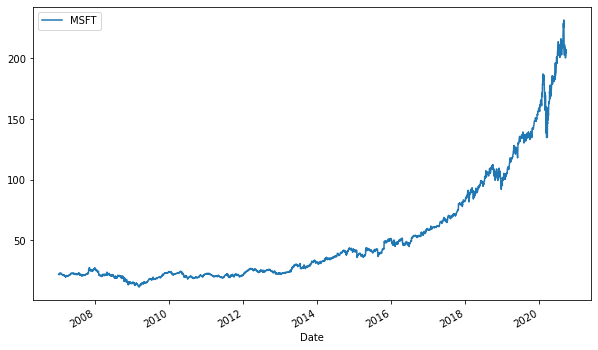

In [4]:
data.plot(figsize=(10, 6));

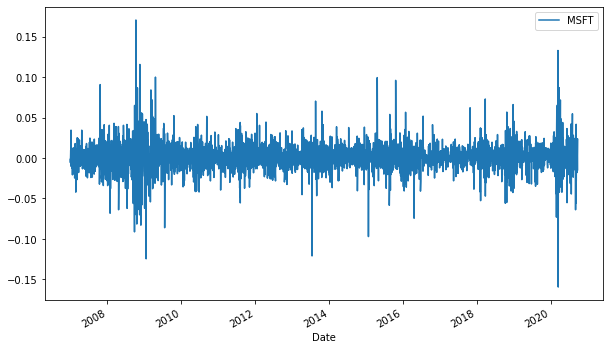

In [5]:
log_returns.plot(figsize = (10, 6))

In [6]:
u = log_returns.mean()
u

MSFT    0.000644
dtype: float64

In [7]:
var = log_returns.var()
var

MSFT    0.000322
dtype: float64

In [8]:
drift = u - (0.5 * var)
drift

MSFT    0.000483
dtype: float64

In [9]:
stdev = log_returns.std()
stdev

MSFT    0.017938
dtype: float64

In [10]:
type(drift)

pandas.core.series.Series

In [11]:
type(stdev)

pandas.core.series.Series

In [12]:
np.array(drift)

array([0.00048338])

In [13]:
drift.values

array([0.00048338])

In [14]:
stdev.values

array([0.01793826])

In [15]:
norm.ppf(0.95)

1.6448536269514722

In [16]:
x = np.random.rand(10, 2)
x

array([[0.50181519, 0.6327882 ],
       [0.15968388, 0.21289236],
       [0.55936749, 0.54529679],
       [0.22002803, 0.96616985],
       [0.52301051, 0.36746698],
       [0.94381062, 0.67048468],
       [0.51578735, 0.89376532],
       [0.00780315, 0.99414195],
       [0.41440268, 0.61753679],
       [0.6498229 , 0.11391358]])

In [17]:
norm.ppf(x)

array([[ 0.00455001,  0.33924708],
       [-0.99575798, -0.79642558],
       [ 0.14936577,  0.11378728],
       [-0.77209853,  1.82726255],
       [ 0.0577108 , -0.33856962],
       [ 1.58759145,  0.44125191],
       [ 0.03958334,  1.24680403],
       [-2.41799474,  2.52058181],
       [-0.21623399,  0.29901786],
       [ 0.38484237, -1.2059749 ]])

In [18]:
Z = norm.ppf(np.random.rand(10,2))
Z

array([[-1.70694875, -0.41267318],
       [-0.26349582,  0.18852651],
       [ 0.27343588,  1.63980924],
       [ 0.85706683, -2.03611952],
       [ 0.90235685,  0.72802554],
       [ 0.64855621, -0.04640423],
       [-0.96817256,  0.97735859],
       [ 0.36871971,  0.42675098],
       [-0.93250746, -0.14757888],
       [ 0.60885742, -0.08005886]])

In [19]:
t_intervals = 1000
iterations = 10

daily_returns = np.exp(drift.values + stdev.values * norm.ppf(np.random.rand(t_intervals, iterations)))

In [20]:
daily_returns

array([[1.0181869 , 1.00111633, 1.03007719, ..., 1.00645733, 0.97867203,
        1.02448495],
       [0.99435471, 1.00375877, 0.98247681, ..., 1.00722488, 1.02058165,
        0.99777505],
       [1.01037068, 0.97564299, 1.02385691, ..., 0.98709192, 0.99107945,
        1.00337122],
       ...,
       [1.00907137, 1.00835328, 1.00253607, ..., 1.02107888, 1.03174357,
        1.00099432],
       [1.0066997 , 1.00635633, 0.9781378 , ..., 0.9941708 , 0.98253175,
        1.00050137],
       [1.03624605, 1.00589273, 0.9993992 , ..., 1.01346537, 1.02251568,
        0.98427993]])

In [21]:
S0 = data.iloc[-1]
S0

MSFT    204.420105
Name: 2020-09-23 00:00:00, dtype: float64

In [22]:
price_list = np.zeros_like(daily_returns)

In [23]:
price_list

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [24]:
price_list[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [25]:
price_list[0] = S0
price_list

array([[204.42010498, 204.42010498, 204.42010498, ..., 204.42010498,
        204.42010498, 204.42010498],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ]])

In [26]:
for t in range(1, t_intervals):
    price_list[t] = price_list[t - 1] * daily_returns[t]

In [27]:
price_list

array([[204.42010498, 204.42010498, 204.42010498, ..., 204.42010498,
        204.42010498, 204.42010498],
       [203.26609412, 205.18847301, 200.83801339, ..., 205.89701594,
        208.62740758, 203.9652807 ],
       [205.37410077, 200.19069515, 205.62938763, ..., 203.23927994,
        206.76633692, 204.65289351],
       ...,
       [299.86657029, 299.75089376, 399.40650752, ..., 517.69688236,
        179.99186814, 522.05185789],
       [301.87558695, 301.65620939, 390.67460392, ..., 514.67912227,
        176.84772579, 522.31359905],
       [312.8173834 , 303.43378658, 390.43988674, ..., 521.60946831,
        180.82957224, 514.10279284]])

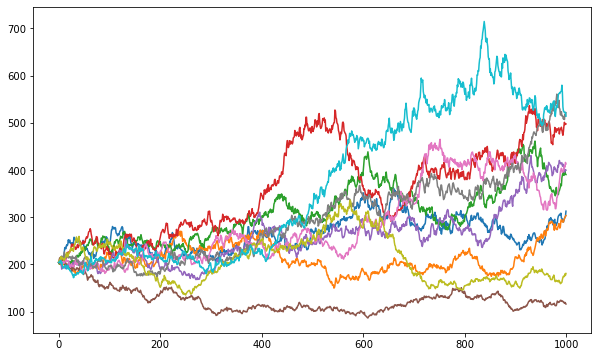

In [28]:
plt.figure(figsize=(10,6))
plt.plot(price_list);